## Предобработка данных

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('C:/Users/majkl/WorkSpace/Project_7/data.tsv', sep='\t', parse_dates=[2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387353 entries, 0 to 387352
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ym:s:visitID              387353 non-null  float64       
 1   ym:s:clientID             387353 non-null  uint64        
 2   ym:s:dateTimeUTC          387353 non-null  datetime64[ns]
 3   ym:s:startURL             387338 non-null  object        
 4   ym:s:endURL               387338 non-null  object        
 5   ym:s:pageViews            387353 non-null  int64         
 6   ym:s:visitDuration        387353 non-null  int64         
 7   ym:s:isNewUser            387353 non-null  int64         
 8   ym:s:bounce               387353 non-null  int64         
 9   ym:s:regionCountry        382478 non-null  object        
 10  ym:s:regionCity           326661 non-null  object        
 11  ym:s:networkType          43035 non-null   object        
 12  ym

In [14]:
df.columns = [col.replace('ym:s:', '') for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387353 entries, 0 to 387352
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   visitID              387353 non-null  float64       
 1   clientID             387353 non-null  uint64        
 2   dateTimeUTC          387353 non-null  datetime64[ns]
 3   startURL             387338 non-null  object        
 4   endURL               387338 non-null  object        
 5   pageViews            387353 non-null  int64         
 6   visitDuration        387353 non-null  int64         
 7   isNewUser            387353 non-null  int64         
 8   bounce               387353 non-null  int64         
 9   regionCountry        382478 non-null  object        
 10  regionCity           326661 non-null  object        
 11  networkType          43035 non-null   object        
 12  browserLanguage      327934 non-null  object        
 13  browserCountry

In [15]:
df.columns


Index(['visitID', 'clientID', 'dateTimeUTC', 'startURL', 'endURL', 'pageViews',
       'visitDuration', 'isNewUser', 'bounce', 'regionCountry', 'regionCity',
       'networkType', 'browserLanguage', 'browserCountry', 'mobilePhone',
       'operatingSystemRoot', 'browser', 'browserEngine', 'screenOrientation',
       'screenWidth', 'screenHeight', 'windowClientWidth',
       'windowClientHeight'],
      dtype='object')

In [16]:
df.head()

,visitID,clientID,dateTimeUTC,startURL,endURL,pageViews,visitDuration,isNewUser,bounce,regionCountry,...,browserCountry,mobilePhone,operatingSystemRoot,browser,browserEngine,screenOrientation,screenWidth,screenHeight,windowClientWidth,windowClientHeight
0,1.801686e+19,1568056026568729022,2020-01-01 03:28:50,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,1,0,1,Russia,...,gb,NaN,gnu_linux,chrome,WebKit,2,1920,1080,1905,981
1,1.802359e+19,1577864187752491163,2020-01-01 10:36:27,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,9,215,1,0,Singapore,...,us,apple,ios_double,safari_mobile,WebKit,1,375,667,375,559
2,1.802460e+19,1567765219104836417,2020-01-01 11:40:44,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,88,0,0,Russia,...,ru,apple,ios_double,yandex_browser,WebKit,1,414,736,414,660
3,1.802475e+19,1576839432510419026,2020-01-01 11:50:13,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,19,0,0,China,...,ru,samsung,android,chromemobile,WebKit,1,412,892,412,756
4,1.802518e+19,1576246599115183097,2020-01-01 12:17:33,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,2,0,0,Russia,...,ru,NaN,gnu_linux,firefox,Gecko,2,1920,1080,913,942


In [19]:
#проверка на пропущенные значения
df.isnull().sum()

visitID                     0
clientID                    0
dateTimeUTC                 0
startURL                   15
endURL                     15
pageViews                   0
visitDuration               0
isNewUser                   0
bounce                      0
regionCountry            4875
regionCity              60692
networkType            344318
browserLanguage         59419
browserCountry         162370
mobilePhone            313999
operatingSystemRoot       182
browser                    60
browserEngine               6
screenOrientation           0
screenWidth                 0
screenHeight                0
windowClientWidth           0
windowClientHeight          0
dtype: int64

In [21]:
#дубли значений
df.loc[df.duplicated()]

,visitID,clientID,dateTimeUTC,startURL,endURL,pageViews,visitDuration,isNewUser,bounce,regionCountry,...,browserCountry,mobilePhone,operatingSystemRoot,browser,browserEngine,screenOrientation,screenWidth,screenHeight,windowClientWidth,windowClientHeight


## Сколько всего визитов представлено в данных?

In [73]:
print(f'Количество визитов: {df.visitDuration.count()}')

Количество визитов: 387353


## Когда совершены первый и последний визиты?

In [24]:
print(f'Первый визит совершен: {df.dateTimeUTC.min()}, последний визит совершен {df.dateTimeUTC.max()}')

Первый визит совершен: 2020-01-01 03:28:50, последний визит совершен 2024-02-25 23:58:46


## Постройте динамику количества визитов во времени по дням

In [34]:

visits['date'] = pd.to_datetime(df['dateTimeUTC']).dt.date
visits

,visitID,clientID,dateTimeUTC,startURL,endURL,pageViews,visitDuration,isNewUser,bounce,regionCountry,...,mobilePhone,operatingSystemRoot,browser,browserEngine,screenOrientation,screenWidth,screenHeight,windowClientWidth,windowClientHeight,date
0,1.801686e+19,1568056026568729022,2020-01-01 03:28:50,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,1,0,1,Russia,...,NaN,gnu_linux,chrome,WebKit,2,1920,1080,1905,981,2020-01-01
1,1.802359e+19,1577864187752491163,2020-01-01 10:36:27,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,9,215,1,0,Singapore,...,apple,ios_double,safari_mobile,WebKit,1,375,667,375,559,2020-01-01
2,1.802460e+19,1567765219104836417,2020-01-01 11:40:44,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,88,0,0,Russia,...,apple,ios_double,yandex_browser,WebKit,1,414,736,414,660,2020-01-01
3,1.802475e+19,1576839432510419026,2020-01-01 11:50:13,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,19,0,0,China,...,samsung,android,chromemobile,WebKit,1,412,892,412,756,2020-01-01
4,1.802518e+19,1576246599115183097,2020-01-01 12:17:33,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,2,0,0,Russia,...,NaN,gnu_linux,firefox,Gecko,2,1920,1080,913,942,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,8.349148e+17,170889374781031580,2024-02-25 23:42:27,https://miptstats.github.io/,https://miptstats.github.io/,1,15,1,0,Russia,...,samsung,android,chromemobile,WebKit,1,384,832,384,756,2024-02-25
387349,8.349555e+17,1706366044539443064,2024-02-25 23:45:02,https://miptstats.github.io/courses/python/09_...,https://miptstats.github.io/courses/python/09_...,1,0,0,1,Russia,...,NaN,windows,chrome,WebKit,2,1600,900,1583,771,2024-02-25
387350,8.350287e+17,1707574597556843446,2024-02-25 23:49:41,https://miptstats.github.io/courses/ad_fivt/ta...,https://miptstats.github.io/courses/ad_fivt/ta...,1,0,0,1,Russia,...,NaN,windows,chrome,WebKit,2,1536,864,1519,729,2024-02-25
387351,8.350809e+17,17088943799001288,2024-02-25 23:52:59,https://mipt-stats.gitlab.io/courses/python/05...,https://mipt-stats.gitlab.io/courses/python/05...,1,23,1,0,Russia,...,realme,android,yandexsearch,WebKit,1,393,851,393,687,2024-02-25


In [74]:
visits = df.groupby('date') \
    .agg({'visitID':'count'}) \
    .sort_values('date')
visits

,visitID
date,
2020-01-01,16
2020-01-02,28
2020-01-03,35
2020-01-04,36
2020-01-05,29
...,...
2024-02-21,894
2024-02-22,787
2024-02-23,906


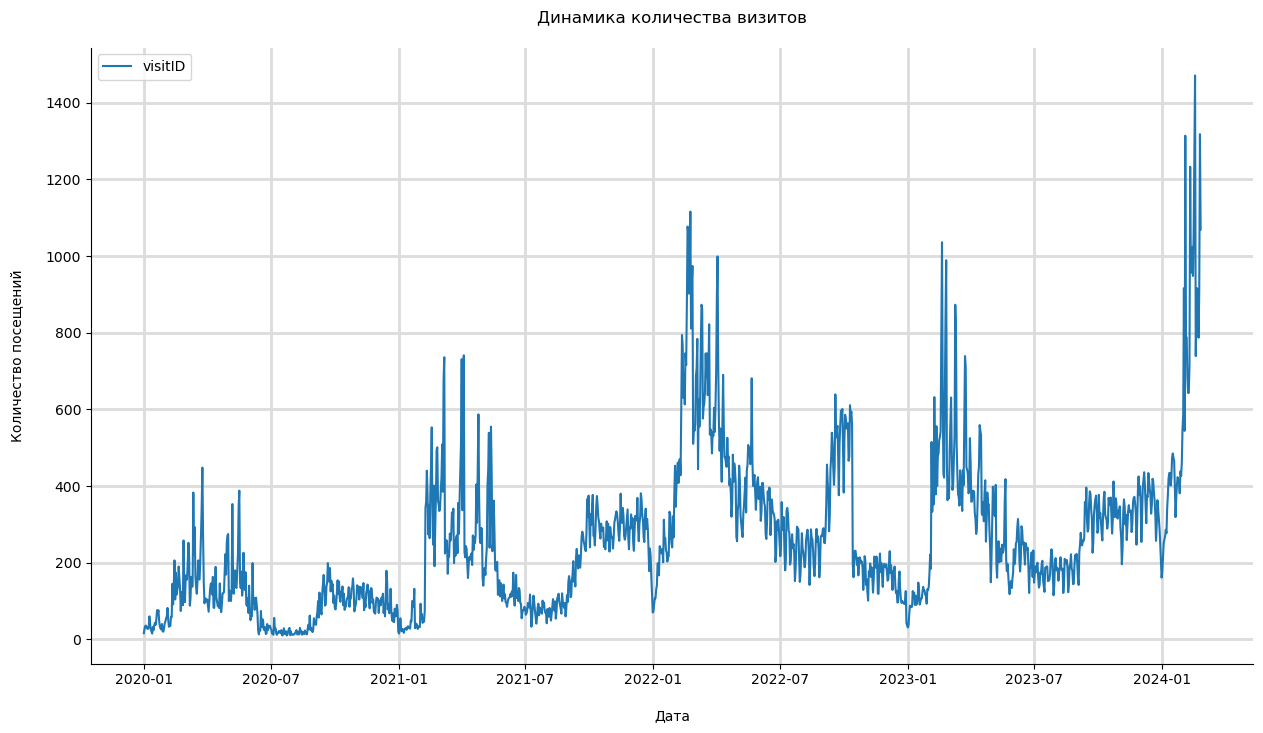

In [76]:

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=visits, ax=ax)
ax.set_title('Динамика количества визитов\n')
ax.set_ylabel('Количество посещений\n')
ax.set_xlabel('\nДата')
plt.grid(color='gainsboro', linestyle='-', linewidth=2)
sns.despine()
plt.show() 

## Сколько уникальных пользователей в данных?

In [62]:
print(f'Количество уникальных пользователей равно {df.clientID.nunique()}')

Количество уникальных пользователей равно 162474


## Сколько в среднем один пользователь совершил визитов? Сколько максимально?

In [71]:
visits_count = df.groupby(by="clientID").count()
print(f"В среднем пользователь совершает визитов: {np.mean(visits_count).round(2)}")
print(f"Максимум совершено визитов: {np.max(visits_count)}")

В среднем пользователь совершает визитов: 2.13
Максимум совершено визитов: 58700


## Постройте гистограмму глубины и продолжительности визитов

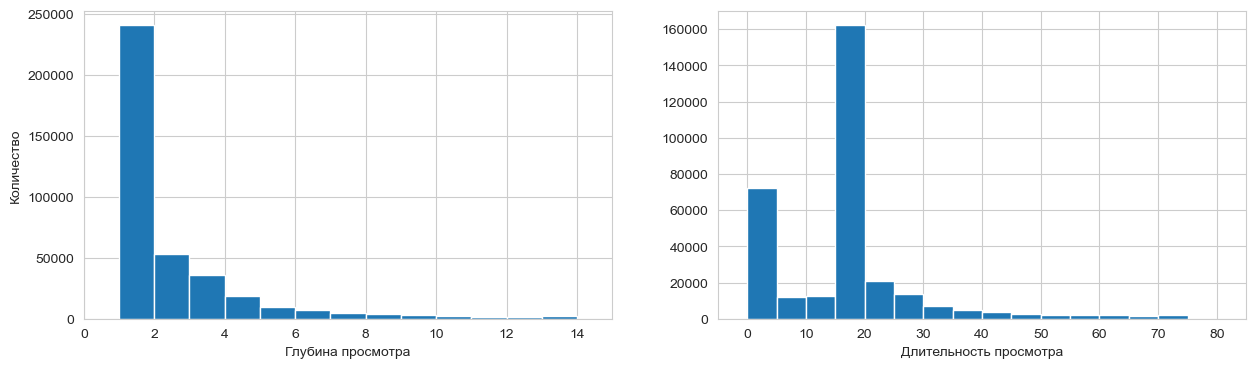

In [80]:
with sns.axes_style("whitegrid"):
    _, axes = plt.subplots(1, 2, figsize=(15, 4))

    axes[0].hist(df["pageViews"], bins=np.arange(1, 15))
    axes[0].set_xlabel("Глубина просмотра")
    axes[0].set_ylabel("Количество")
    axes[0].set_xlim((0, 15))

    axes[1].hist(df["visitDuration"], bins=np.arange(0, 80, 5))
    axes[1].set_xlabel("Длительность просмотра")
    axes[1].set_xlim((-5, 85))

    plt.show()

## Из каких стран больше пользователей?

C:\Users\majkl\AppData\Local\Temp\ipykernel_10796\539610725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts.iloc[:5], orient="h", palette='plasma')


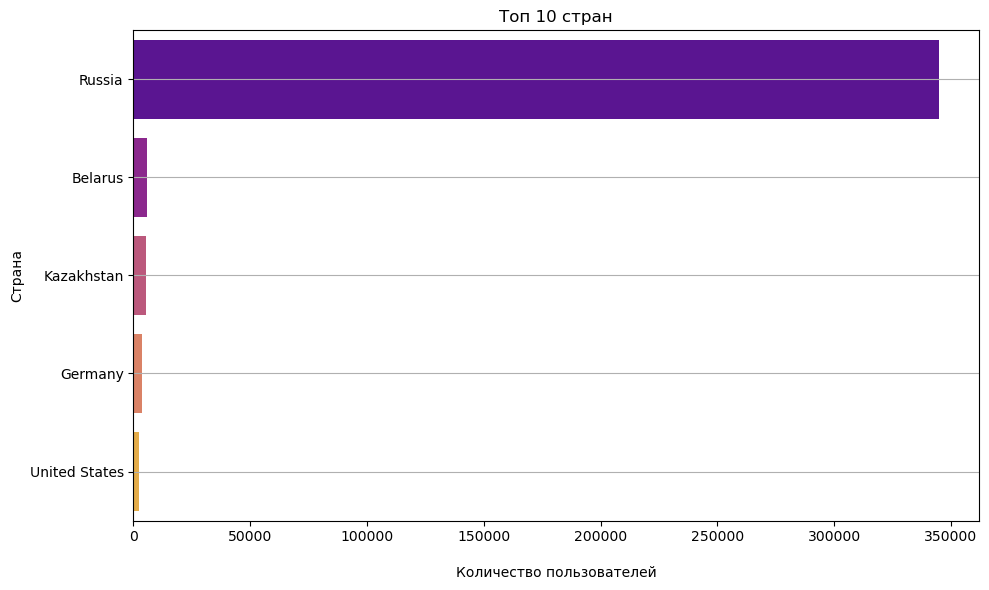

In [114]:
country_counts = df['regionCountry'].value_counts()
country_counts
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts.iloc[:5], orient="h", palette='plasma')
plt.title('Топ 10 стран')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('Страна')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

## Какие браузеры и операционные системы в топе?

C:\Users\majkl\AppData\Local\Temp\ipykernel_10796\2199870311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brows.iloc[:10], orient="h", palette='plasma')


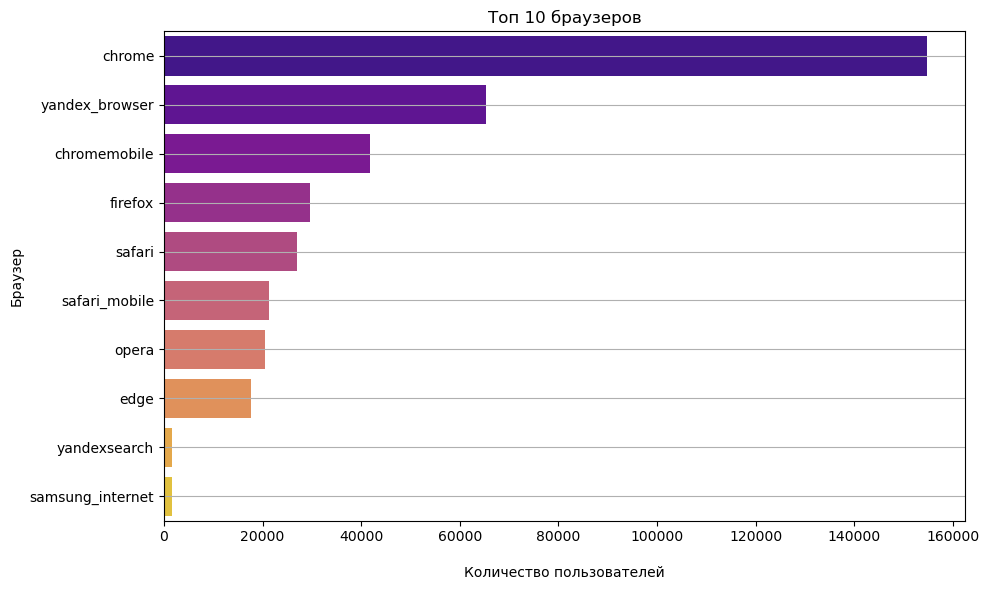

In [117]:
brows = df['browser'].value_counts()
brows
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=brows.iloc[:10], orient="h", palette='plasma')
plt.title('Топ 10 браузеров')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('Браузер')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

C:\Users\majkl\AppData\Local\Temp\ipykernel_10796\491623122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=os.iloc[:5], orient="h", palette='plasma')


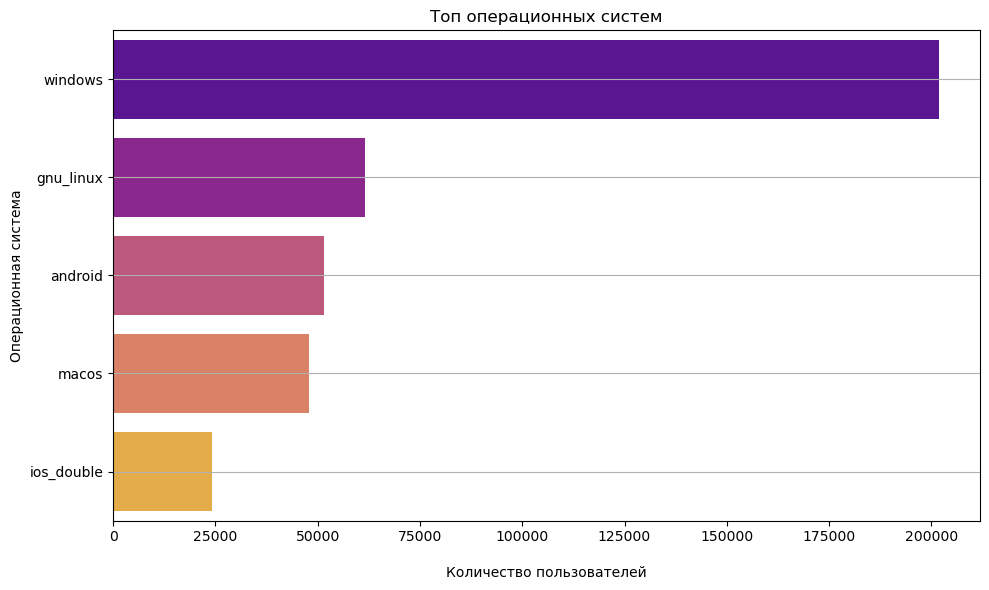

In [121]:
os = df['operatingSystemRoot'].value_counts()
os
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=os.iloc[:5], orient="h", palette='plasma')
plt.title('Топ операционных систем')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('Операционная система')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()